In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import nltk; nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import pandas as pd
# from wordcloud import WordCloud
# from wordcloud import ImageColorGenerator
# from wordcloud import STOPWORDS
from matplotlib import *
import matplotlib.pyplot as plt 
from gensim.models import Word2Vec

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1000)>


In [13]:
df = pd.read_csv('../datset/CA_user_reviews.csv')
df.head(2)

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1.0,1.0,0.0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33,...,0,0,0,0,0,0,0,0,0,0
1,1,9ag-bC-521T1i3IypXr4Ug,sx_cqxyWRUoOIoy_AXmLdQ,B5XSoSG3SfvQGtKEGQ1tSQ,4.0,1.0,0.0,0.0,I work with a college group that does camping ...,2013-09-07 21:16:36,...,2,2,0,0,9,12,11,11,11,0


In [14]:
#only run once, identifying unique businesses and 
df['business_num'] = df.sort_values('business_id').groupby('business_id').ngroup() + 1
df = df.sort_values('business_id').set_index('business_num')
df.rename({'stars_x': "review_stars"})
df.insert(loc = 0,column = 'Reviewer' , value = df['name_y'])
df.insert(loc = 0,column = 'Business' , value = df['name_x'])
df = df.drop([df.columns[2], 'business_id', 'review_id'], axis=1)
df.head(2)

,Business,Reviewer,user_id,stars_x,useful_x,funny_x,cool_x,text,date,name_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
business_num,,,,,,,,,,,,,,,,,,,,,
1,Alameda Park,Mike,B0lgHisW27W7xoqjT595tA,5.0,0.0,1.0,0.0,When ever I'm in Santa Barbara we have to stop...,2015-06-16 03:27:04,Alameda Park,...,0,0,0,0,0,0,0,0,0,0
1,Alameda Park,Christina,LNxK3lXQbkuPTzuJaL9D3g,5.0,0.0,0.0,0.0,Very fun park for kids of all ages! Almost rem...,2017-03-11 03:45:03,Alameda Park,...,0,0,0,0,2,0,0,0,0,0


In [15]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound'] 

df['SentimentScore'] = df['text'].apply(get_sentiment_score)
df.head(2)

,Business,Reviewer,user_id,stars_x,useful_x,funny_x,cool_x,text,date,name_x,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,SentimentScore
business_num,,,,,,,,,,,,,,,,,,,,,
1,Alameda Park,Mike,B0lgHisW27W7xoqjT595tA,5.0,0.0,1.0,0.0,When ever I'm in Santa Barbara we have to stop...,2015-06-16 03:27:04,Alameda Park,...,0,0,0,0,0,0,0,0,0,0.4588
1,Alameda Park,Christina,LNxK3lXQbkuPTzuJaL9D3g,5.0,0.0,0.0,0.0,Very fun park for kids of all ages! Almost rem...,2017-03-11 03:45:03,Alameda Park,...,0,0,0,2,0,0,0,0,0,0.9039


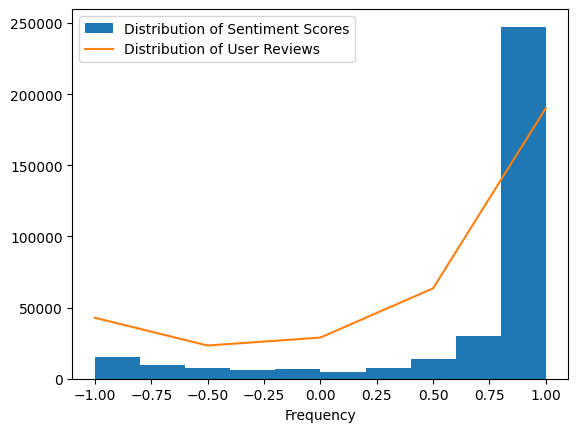

In [16]:
sentiment_scores = df['SentimentScore']
review_stars = df['stars_x'].replace([1, 2, 3, 4, 5], [-1, -0.5, 0, 0.5, 1]).value_counts().sort_index()

plt.hist(sentiment_scores, label='Distribution of Sentiment Scores')
plt.plot(review_stars, label='Distribution of User Reviews')
plt.xlabel('Value')
plt.xlabel('Frequency')
plt.legend()

In [17]:
#text mining from this point
# def remove_stopwords(text):
#     stop_words = set(stopwords.words('english'))
#     words = word_tokenize(text)
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     return ' '.join(filtered_words)

# df['text'] = df['text'].apply(remove_stopwords)

In [18]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]+', '', regex=True).str.replace("  ", " ")

def filter_adjectives(words):
    tagged_words = pos_tag(word_tokenize(' '.join(words.index.tolist())))
    adjectives = [word for word, pos in tagged_words if pos == 'JJ']
    filtered_series = words.loc[adjectives]
    return filtered_series

words = pd.Series(' '.join(df.text).split()).value_counts()
adjectives = filter_adjectives(words)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/var/folders/xj/fy4wdhd12cv0fsrwvy9zgk680000gn/T/ipykernel_42157/1284557942.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['text'] = df['text'].str.replace('[^\w\s]+', '', regex=True).str.replace("  ", " ")


In [19]:
adjectives.head(10)

great        157259
good         147375
nice          62674
amazing       52559
friendly      52004
delicious     51724
other         50991
ive           47094
recommend     46355
little        44747
Name: count, dtype: int64

In [82]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

sentences = df['text'].values.tolist()

adjective_sequences = []
context_size = 5

for sentence in sentences:
    tokens = word_tokenize(sentence)
    tagged = pos_tag(tokens)

    for i, (word, tag) in enumerate(tagged):
        if tag.startswith('JJ'):
            following_context = tokens[i:i + context_size + 1]
            adjective_sequences.append(following_context)

model = Word2Vec(sentences=adjective_sequences, vector_size=100, window=context_size, sg=1, min_count=1)
model.train(adjective_sequences, total_examples=len(adjective_sequences), epochs=10)

similar_words = {}
for target_word in adjectives.index.tolist()[:4750]:
    similar_words[target_word] = model.wv.most_similar(target_word, topn=25)

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [93]:
similar_words.keys()

dict_keys(['great', 'good', 'nice', 'amazing', 'friendly', 'delicious', 'other', 'ive', 'recommend', 'little', 'much', 'chicken', 'super', 'next', 'sure', 'wine', 'new', 'want', 'few', 'many', 'small', 'give', 'sb', 'happy', 'breakfast', 'eat', 'perfect', 'favorite', 'bad', 'long', 'last', 'worth', 'clean', 'awesome', 'cheese', 'beautiful', 'meal', 'fish', 'outside', 'wonderful', 'such', 'big', 'different', 'free', 'beach', 'special', 'top', 'tasty', 'sweet', 'overall', 'same', 'local', 'full', 'hot', 'enjoyed', 'old', 'able', 'thought', 'open', 'busy', 'large', 'id', 'fantastic', 'patio', 'quick', 'dish', 'couple', 'easy', 'huge', 'high', 'whole', 'ok', 'half', 'professional', 'tell', 'ill', 'mexican', 'cool', 'own', 'star', 'extra', 'yelp', 'several', 'attentive', 'wish', 'cooked', 'bring', 'wrong', 'second', 'la', 'decent', 'cold', 'rude', 'comfortable', 'cute', 'outdoor', 'live', 'steak', 'warm', 'yummy', 'real', 'fine', 'drive', 'reasonable', 'isnt', 'late', 'entire', 'dessert', '

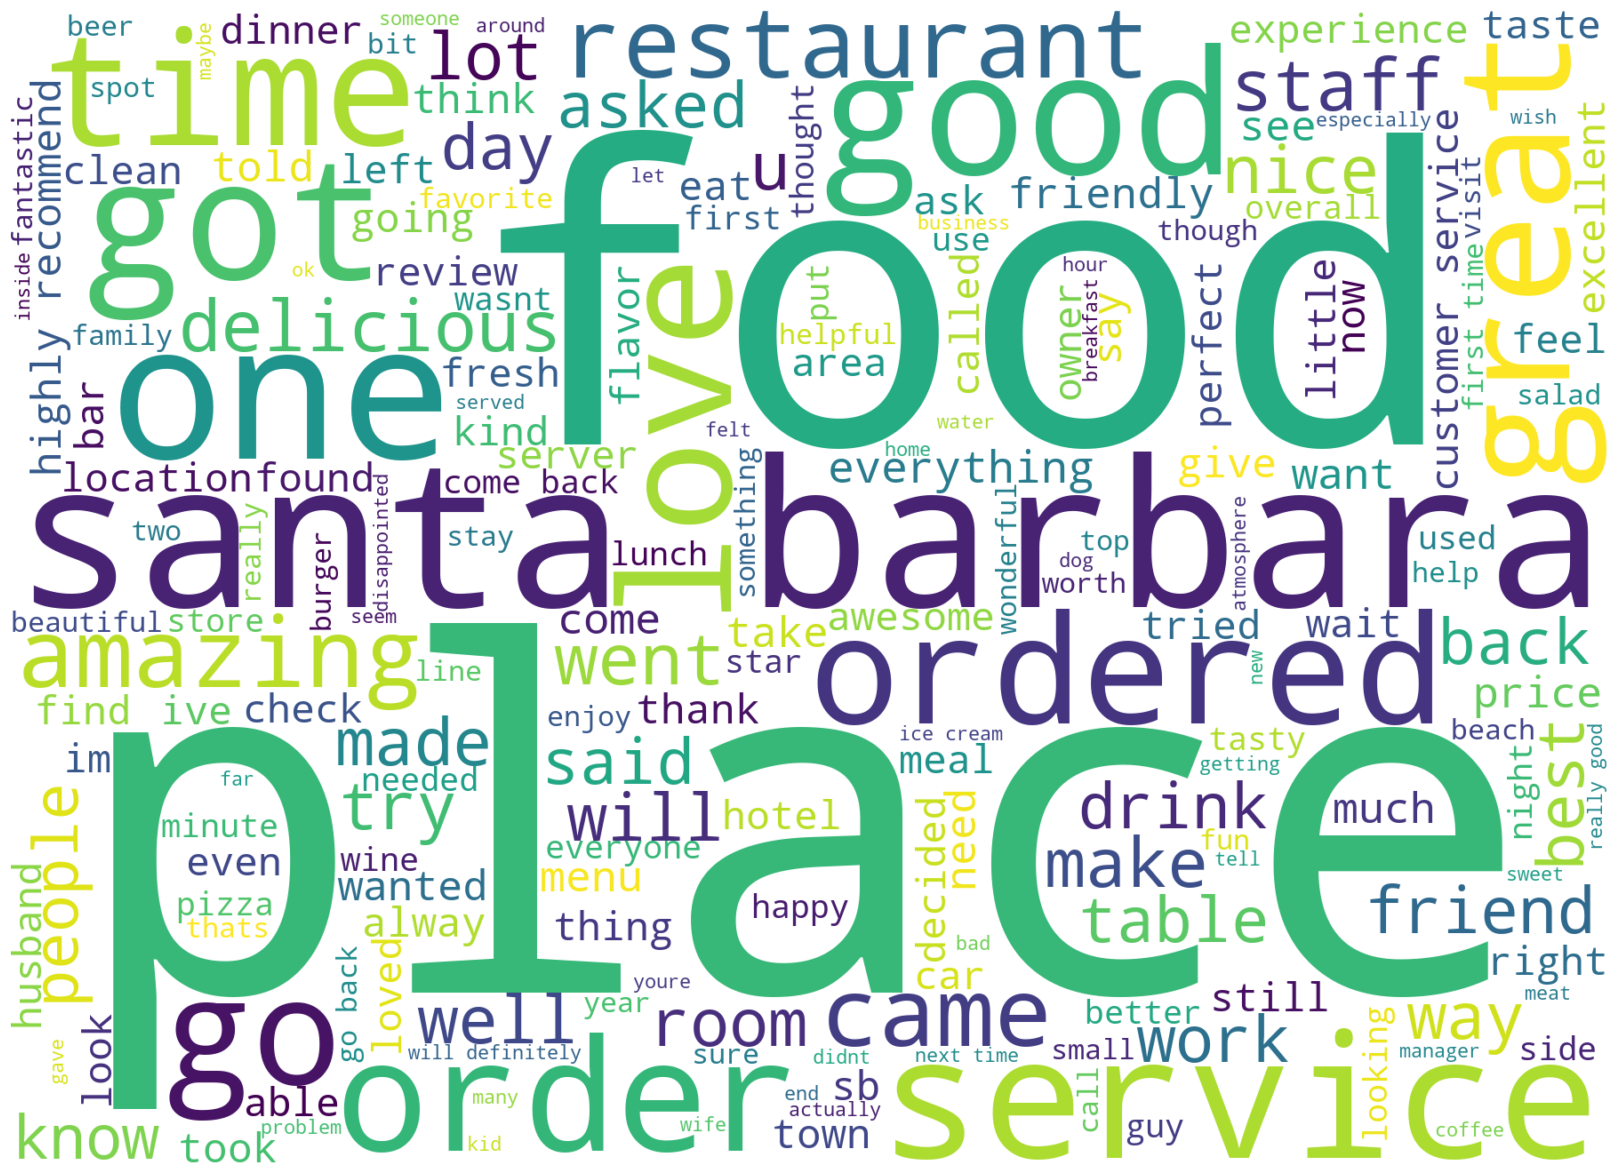

In [ ]:
#wordcloud

ALL_re = " ".join(i for i in df["text"].replace('nan', np.nan).dropna())
stopwords = set(STOPWORDS)
stopwords.add('s')
wordcloud = WordCloud(stopwords=stopwords, width=1800, height=1300, background_color="white").generate(ALL_re)
plt.figure( figsize=(30,15) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
one_df = df[df['stars_x'] == 1]
len(one_df)

42849

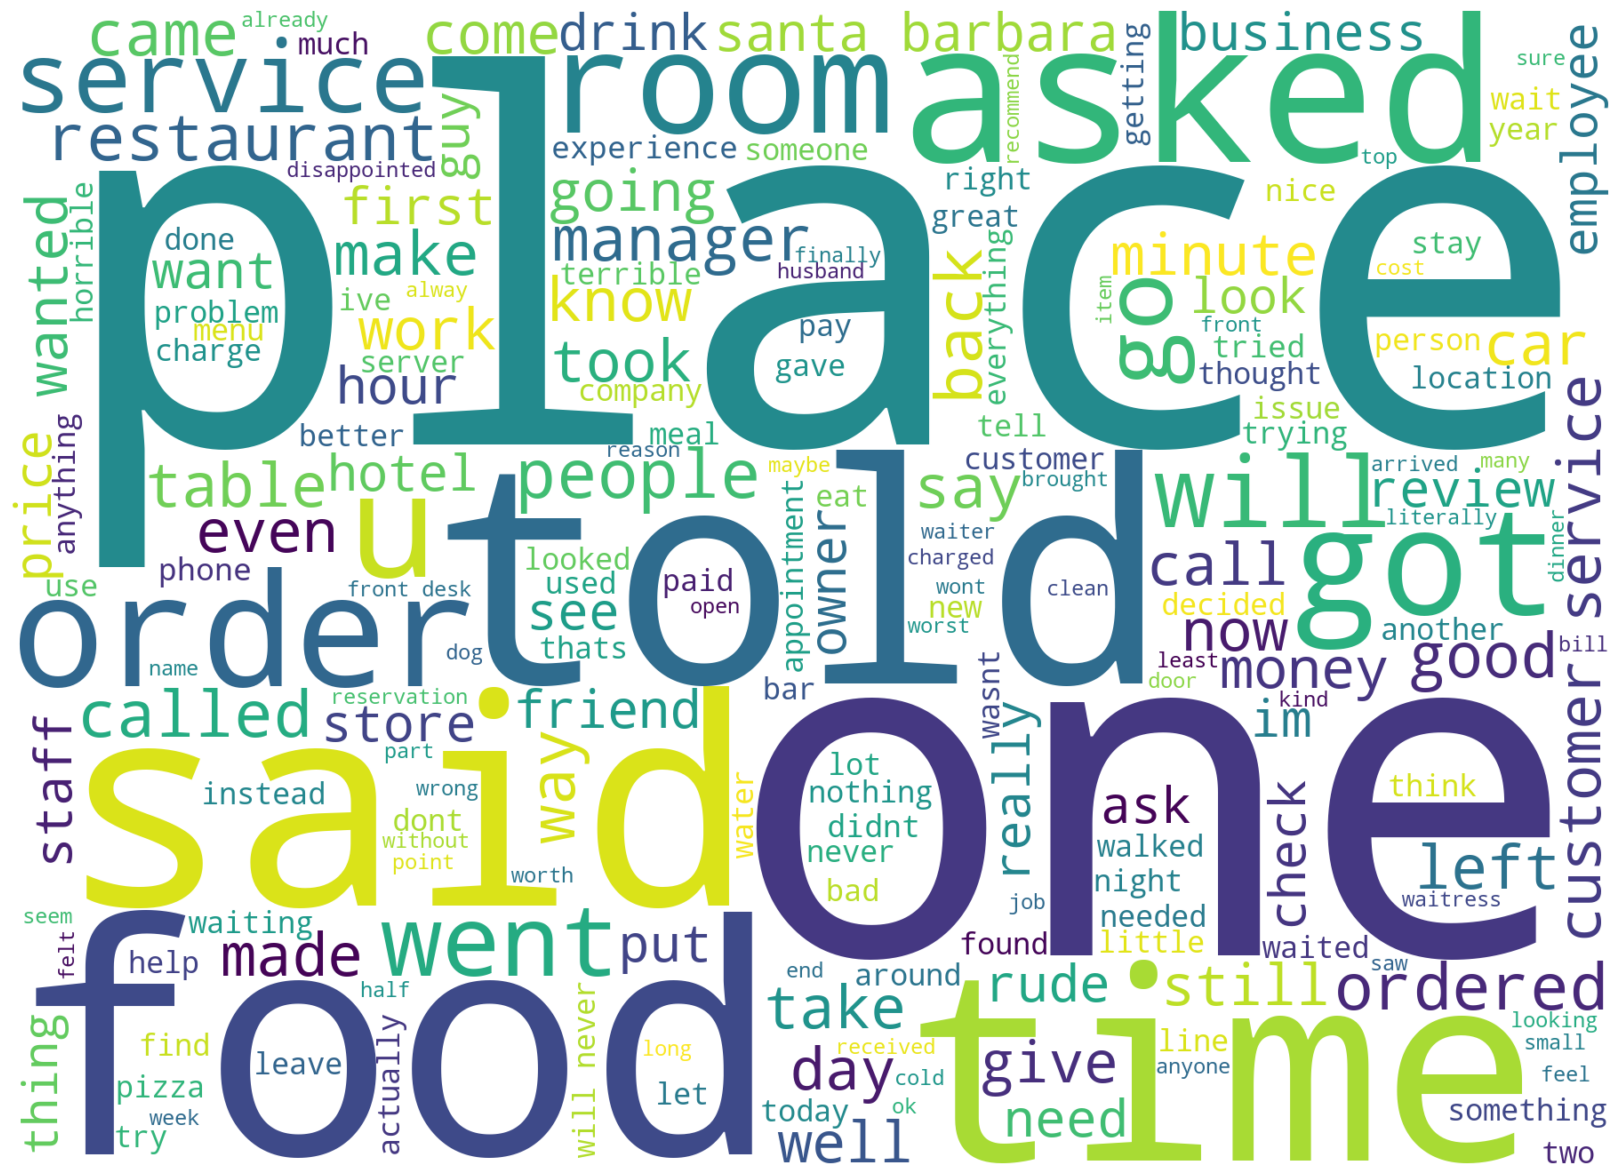

In [20]:
#wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from matplotlib import *
import matplotlib.pyplot as plt 

ALL_re = " ".join(i for i in one_df["text"].replace('nan', np.nan).dropna())
stopwords = set(STOPWORDS)
stopwords.add('s')
wordcloud = WordCloud(stopwords=stopwords, width=1800, height=1300, background_color="white").generate(ALL_re)
plt.figure( figsize=(30,15) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#bar graph of review distribution
#